In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.DataFrame({'Quater':['Jun-16',
'Sep-16',
'Dec-16',
'Mar-17',
'Jun-17',
'Sep-17',
'Dec-17',
'Mar-18',
'Jun-18',
'Sep-18',
'Dec-18',
'Mar-19',
'Jun-19',
'Sep-19',
'Dec-19',
'Mar-20',
'Jun-20',
'Sep-20',
'Dec-20',
'Mar-21'],'Sales':[7398.91,
7669.53,
6245.90,
6915.20,
7971.58,
8361.99,
7305.49,
8564.04,
8809.82,
9090.94,
7864.82,
7884.96,
8030.27,
7570.70,
6996.73,
6238.39,
2971.54,
9367.34,
9775.77,
8685.97
]}
)

In [3]:
df

,Quater,Sales
0,Jun-16,7398.91
1,Sep-16,7669.53
2,Dec-16,6245.90
3,Mar-17,6915.20
4,Jun-17,7971.58
5,Sep-17,8361.99
6,Dec-17,7305.49
7,Mar-18,8564.04
8,Jun-18,8809.82
9,Sep-18,9090.94


<AxesSubplot:xlabel='Quater', ylabel='Sales'>

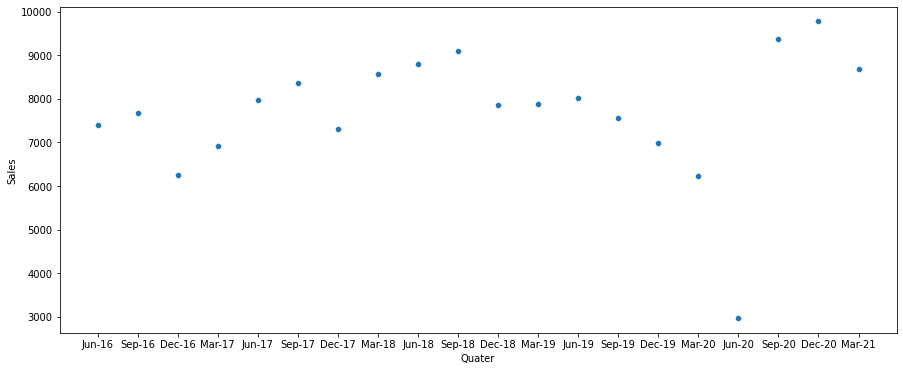

In [4]:
plt.figure(figsize=(15,6))
sns.scatterplot(y='Sales',x='Quater',data=df)

<AxesSubplot:xlabel='Quater', ylabel='Sales'>

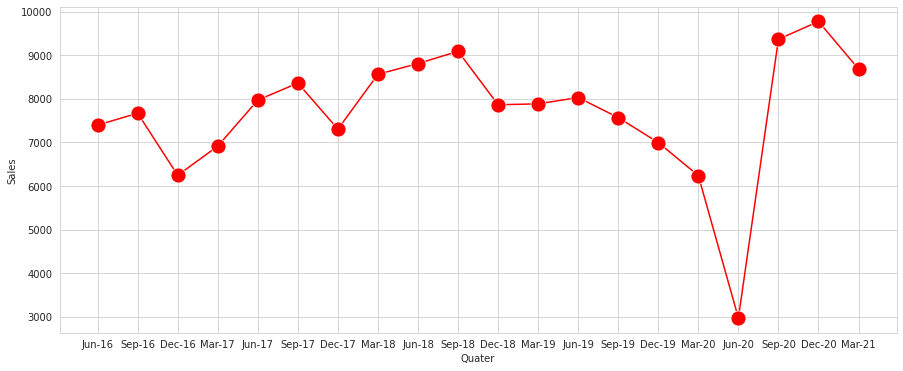

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
sns.lineplot(y='Sales',x='Quater',data=df,marker='o',ms=15,color='red')

In [6]:
# Forecasting using Mean Average

In [7]:
## Moving average is one of the simplest forecasting technique which forecasts the future value of a time series data using average
## of the past N Observation. 

In [8]:
# df['mavg_12'] = df['Sales'].rolling(window=0).mean().shift(1)

In [9]:
df

,Quater,Sales
0,Jun-16,7398.91
1,Sep-16,7669.53
2,Dec-16,6245.90
3,Mar-17,6915.20
4,Jun-17,7971.58
5,Sep-17,8361.99
6,Dec-17,7305.49
7,Mar-18,8564.04
8,Jun-18,8809.82
9,Sep-18,9090.94


In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
arima = ARIMA(df['Sales'][0:20].astype(np.float64),
             order=(1,0,0))
ar_model = arima.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [12]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   20
Model:                     ARMA(1, 0)   Log Likelihood                -173.133
Method:                       css-mle   S.D. of innovations           1389.258
Date:                Wed, 07 Jul 2021   AIC                            352.266
Time:                        04:53:09   BIC                            355.254
Sample:                             0   HQIC                           352.850
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7695.3356    391.109     19.676      0.000    6928.777    8461.895
ar.L1.Sales     0.2161      0.215      1.005      0.315      -0.205       0.638
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.6275           +0.0000j            4.6275            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
# Forecasting next 10 Quater
predict = ar_model.predict(20,30)
print(predict)

20    7909.413418
21    7741.598196
22    7705.333035
23    7697.496071
24    7695.802490
25    7695.436504
26    7695.357414
27    7695.340322
28    7695.336629
29    7695.335831
30    7695.335658
dtype: float64


# Thank You...